<a href="https://colab.research.google.com/github/Bluseass/Dataset/blob/main/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D
from keras.layers import Dense

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = (x_train/255)
x_test = (x_test/255)

In [ ]:
y_train_cate = keras.utils.to_categorical(y_train,10)
y_test_cate = keras.utils.to_categorical(y_test,10)

In [ ]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [ ]:
from keras.api._v2.keras import activations
model = keras.Sequential([
    Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2), strides = 2),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2), strides = 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
from tensorflow import keras

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train_cate, batch_size = 32, epochs=2,validation_split=0.2 )

Epoch 1/2
1500/1500 [==============================] - 72s 47ms/step - loss: 0.1391 - accuracy: 0.9574 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 2/2
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0407 - val_accuracy: 0.9876


In [ ]:
model.evaluate(x_test, y_test_cate)

313/313 [==============================] - 4s 11ms/step - loss: 0.0355 - accuracy: 0.9875


[0.035515014082193375, 0.987500011920929]

# ***ГРАФИКИ***

In [ ]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
acts = activation_model.predict(x_test)
first_layer_activation = acts[0]
import matplotlib as plt

313/313 [==============================] - 5s 15ms/step


<ipython-input-14-a26a73193107>:14: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


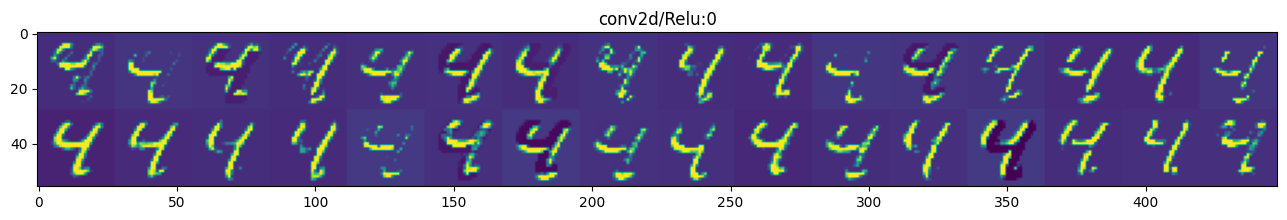

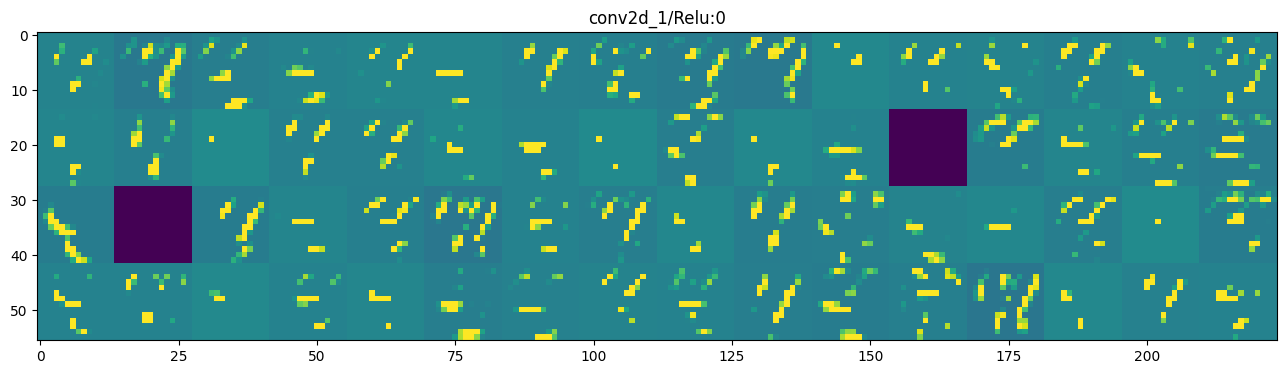

In [ ]:
images_per_row = 16
for layer_output, layer_activation in zip(layer_outputs, acts):
    if not layer_output.name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[6,
                                                :, :,
                                                col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.pyplot.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.pyplot.title(layer_output.name)
        plt.pyplot.grid(False)
        plt.pyplot.imshow(display_grid, aspect='auto', cmap='viridis')
plt.pyplot.show()